In [216]:
import pandas as pd
import numpy as np
import requests
import altair as alt
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
#renderer = 'default' 
#scenario = 0
filename = "uga-football-roster.html"

In [218]:
#read the html file, UGA Football Roster
# 'r' is the default value, opens file for reading
text = open(filename, 'r').read() 

In [219]:
url = 'https://www.sicemdawgs.com/uga-football-roster'
response_status = requests.get(url)
response_status

<Response [200]>

In [220]:
#find tag name 'table' to scrape the roster table from the html 
table = BeautifulSoup(text).find(lambda tag: tag.name=='table')
table

<table class="ros">
<thead>
<tr>
<th class="schgry2 sortable-numeric">No.</th>
<th class="schgry1 sortable-text">Name</th>
<th class="schgry2 sortable-text">Pos.</th>
<th class="schgry2 sortable-numeric">Cl.</th>
<th class="schgry2 sortable-text">Wt.</th>
<th class="schgry2 sortable-numeric">Ht.</th>
<th class="schgry3 sortable-text">Hometown (High School)</th>
</tr>
</thead>
<tbody>
<tr>
<td class="ros3">0</td>
<td class="ros1">Rian Davis</td>
<td class="ros3">ILB</td>
<td class="ros3">Jr.</td>
<td class="ros3">6-2</td>
<td class="ros3">230</td>
<td class="ros2">Apopka, FL (Wekiva)</td>
</tr>
<tr>
<td class="ros3">0</td>
<td class="ros1">Darnell Washington</td>
<td class="ros3">TE</td>
<td class="ros3">Jr.</td>
<td class="ros3">6-7</td>
<td class="ros3">265</td>
<td class="ros2">Las Vegas, NV (Desert Pines)</td>
</tr>
<tr>
<td class="ros3">1</td>
<td class="ros1">Nyland Green</td>
<td class="ros3">DB</td>
<td class="ros3">RFr.</td>
<td class="ros3">6-1</td>
<td class="ros3">185</td>
<

In [221]:
#pulls all trs from table body
all_trs =  table.tbody.find_all('tr')
all_trs

[<tr>
 <td class="ros3">0</td>
 <td class="ros1">Rian Davis</td>
 <td class="ros3">ILB</td>
 <td class="ros3">Jr.</td>
 <td class="ros3">6-2</td>
 <td class="ros3">230</td>
 <td class="ros2">Apopka, FL (Wekiva)</td>
 </tr>, <tr>
 <td class="ros3">0</td>
 <td class="ros1">Darnell Washington</td>
 <td class="ros3">TE</td>
 <td class="ros3">Jr.</td>
 <td class="ros3">6-7</td>
 <td class="ros3">265</td>
 <td class="ros2">Las Vegas, NV (Desert Pines)</td>
 </tr>, <tr>
 <td class="ros3">1</td>
 <td class="ros1">Nyland Green</td>
 <td class="ros3">DB</td>
 <td class="ros3">RFr.</td>
 <td class="ros3">6-1</td>
 <td class="ros3">185</td>
 <td class="ros2">Covington, GA (Newton)</td>
 </tr>, <tr>
 <td class="ros3">2</td>
 <td class="ros1">Kendall Milton</td>
 <td class="ros3">RB</td>
 <td class="ros3">Jr.</td>
 <td class="ros3">6-1</td>
 <td class="ros3">220</td>
 <td class="ros2">Fresno, CA (Buchanan)</td>
 </tr>, <tr>
 <td class="ros3">4</td>
 <td class="ros1">Nolan Smith</td>
 <td class="ros3

In [222]:
#pulls all tds from all trs
all_tds = [tr.find_all('td') for tr in all_trs]
all_tds

[[<td class="ros3">0</td>,
  <td class="ros1">Rian Davis</td>,
  <td class="ros3">ILB</td>,
  <td class="ros3">Jr.</td>,
  <td class="ros3">6-2</td>,
  <td class="ros3">230</td>,
  <td class="ros2">Apopka, FL (Wekiva)</td>],
 [<td class="ros3">0</td>,
  <td class="ros1">Darnell Washington</td>,
  <td class="ros3">TE</td>,
  <td class="ros3">Jr.</td>,
  <td class="ros3">6-7</td>,
  <td class="ros3">265</td>,
  <td class="ros2">Las Vegas, NV (Desert Pines)</td>],
 [<td class="ros3">1</td>,
  <td class="ros1">Nyland Green</td>,
  <td class="ros3">DB</td>,
  <td class="ros3">RFr.</td>,
  <td class="ros3">6-1</td>,
  <td class="ros3">185</td>,
  <td class="ros2">Covington, GA (Newton)</td>],
 [<td class="ros3">2</td>,
  <td class="ros1">Kendall Milton</td>,
  <td class="ros3">RB</td>,
  <td class="ros3">Jr.</td>,
  <td class="ros3">6-1</td>,
  <td class="ros3">220</td>,
  <td class="ros2">Fresno, CA (Buchanan)</td>],
 [<td class="ros3">4</td>,
  <td class="ros1">Nolan Smith</td>,
  <td clas

In [223]:
#returns all text from tds, each row is a list of strings
rows = [[td.text for td in row] for row in all_tds]
rows

[['0', 'Rian Davis', 'ILB', 'Jr.', '6-2', '230', 'Apopka, FL (Wekiva)'],
 ['0',
  'Darnell Washington',
  'TE',
  'Jr.',
  '6-7',
  '265',
  'Las Vegas, NV (Desert Pines)'],
 ['1', 'Nyland Green', 'DB', 'RFr.', '6-1', '185', 'Covington, GA (Newton)'],
 ['2', 'Kendall Milton', 'RB', 'Jr.', '6-1', '220', 'Fresno, CA (Buchanan)'],
 ['4',
  'Nolan Smith',
  'OLB',
  'Sr.',
  '6-3',
  '235',
  'Savannah, GA (IMG Academy)'],
 ['5',
  'Adonai Mitchell',
  'WR',
  'So.',
  '6-4',
  '190',
  'Missouri City, TX (Cane Ridge)'],
 ['5', 'Kelee Ringo', 'DB', 'RSo.', '6-2', '205', 'Tacoma, WA (Saguaro)'],
 ['6',
  'Kenny McIntosh',
  'RB',
  'Sr.',
  '6-1',
  '210',
  'Ft. Lauderdale, FL (University School)'],
 ['8',
  'Dominick Blaylock',
  'WR',
  'Jr.',
  '6-1',
  '205',
  'Marietta, GA (Walton)'],
 ['8',
  'MJ Sherman',
  'OLB',
  'So.',
  '6-2',
  '235',
  'Baltimore, MD (St. John’s College)'],
 ['10',
  'Jamon Dumas-Johnson',
  'LB',
  'So.',
  '6-1',
  '235',
  'Hyattsville, MD (St. Frances Ac

In [224]:
#returns all th from thead 
all_ths = table.thead.find_all('th')
all_ths

[<th class="schgry2 sortable-numeric">No.</th>,
 <th class="schgry1 sortable-text">Name</th>,
 <th class="schgry2 sortable-text">Pos.</th>,
 <th class="schgry2 sortable-numeric">Cl.</th>,
 <th class="schgry2 sortable-text">Wt.</th>,
 <th class="schgry2 sortable-numeric">Ht.</th>,
 <th class="schgry3 sortable-text">Hometown (High School)</th>]

In [225]:
#returns all text from ths as one list of strings/headers
cols = [th.text for th in all_ths]
cols

['No.', 'Name', 'Pos.', 'Cl.', 'Wt.', 'Ht.', 'Hometown (High School)']

In [226]:
#Creates a Data Frame with cols and rows, check # of cols and rows
data = pd.DataFrame(data=rows, columns=cols)
data.shape



(127, 7)

In [227]:
#Change column names, set index to be Number column
data.columns = ['Number', 'Name', 'Position', 'Class', 'Height', 'Weight', 'Home']
data.set_index('Number')

,Name,Position,Class,Height,Weight,Home
Number,,,,,,
0,Rian Davis,ILB,Jr.,6-2,230,"Apopka, FL (Wekiva)"
0,Darnell Washington,TE,Jr.,6-7,265,"Las Vegas, NV (Desert Pines)"
1,Nyland Green,DB,RFr.,6-1,185,"Covington, GA (Newton)"
2,Kendall Milton,RB,Jr.,6-1,220,"Fresno, CA (Buchanan)"
4,Nolan Smith,OLB,Sr.,6-3,235,"Savannah, GA (IMG Academy)"
...,...,...,...,...,...,...
—,George Vining,WR,Jr.,6-0,205,"Macon, GA (Tattnall Square Academy)"
—,Jalon Walker,ILB,Fr.,6-2,225,"Salisbury, NC (Salisbury)"
—,C.J. Washington,ILB,Fr.,6-1,220,"Cedartown, GA (Cedartown)"


In [228]:
#function to check if all items in a column are unique
def dups_check(col):
    if len(data.Number.unique()) < data.shape[0]:
        print('There are dup entries in this column')
    else: print('All values in this column are unique')
        
#check Number column
dups_check(data["Number"])


There are dup entries in this column


In [229]:
#For loop to identify the number of times each Number is in the Number column

def num_counts(col):
    
    counter = {}

    for entry in col:
        if entry in counter.keys():
            counter[entry] = counter[entry] + 1
        else:
            counter[entry] = 1

    return counter
        
#check for dups in Number Column
num_counts(data['Number'])
    


{'0': 2,
 '1': 1,
 '2': 1,
 '4': 1,
 '5': 2,
 '6': 1,
 '8': 2,
 '10': 2,
 '11': 1,
 '12': 1,
 '13': 2,
 '14': 3,
 '15': 2,
 '17': 1,
 '18': 1,
 '19': 1,
 '20': 2,
 '22': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 2,
 '29': 1,
 '30': 1,
 '31': 1,
 '32': 2,
 '33': 1,
 '37': 2,
 '38': 1,
 '39': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 2,
 '46': 1,
 '47': 2,
 '48': 1,
 '49': 1,
 '50': 1,
 '51': 1,
 '52': 1,
 '53': 1,
 '54': 1,
 '55': 2,
 '56': 2,
 '57': 1,
 '58': 1,
 '59': 1,
 '60': 1,
 '63': 1,
 '65': 1,
 '66': 1,
 '67': 1,
 '68': 1,
 '70': 1,
 '73': 1,
 '75': 1,
 '76': 1,
 '77': 1,
 '78': 2,
 '79': 1,
 '80': 1,
 '81': 1,
 '82': 1,
 '84': 1,
 '85': 1,
 '87': 1,
 '88': 2,
 '89': 2,
 '90': 1,
 '91': 1,
 '93': 1,
 '94': 1,
 '96': 2,
 '97': 2,
 '98': 1,
 '99': 1,
 '—': 29}

In [230]:
#replace blank numbers with 'N/A'

data['Number'] = data['Number'].replace(to_replace = '—', value = 'N/A')

#Since the Numbers column is not unique, we will reset the index
data.reset_index()
data

,Number,Name,Position,Class,Height,Weight,Home
0,0,Rian Davis,ILB,Jr.,6-2,230,"Apopka, FL (Wekiva)"
1,0,Darnell Washington,TE,Jr.,6-7,265,"Las Vegas, NV (Desert Pines)"
2,1,Nyland Green,DB,RFr.,6-1,185,"Covington, GA (Newton)"
3,2,Kendall Milton,RB,Jr.,6-1,220,"Fresno, CA (Buchanan)"
4,4,Nolan Smith,OLB,Sr.,6-3,235,"Savannah, GA (IMG Academy)"
...,...,...,...,...,...,...,...
122,N/A,George Vining,WR,Jr.,6-0,205,"Macon, GA (Tattnall Square Academy)"
123,N/A,Jalon Walker,ILB,Fr.,6-2,225,"Salisbury, NC (Salisbury)"
124,N/A,C.J. Washington,ILB,Fr.,6-1,220,"Cedartown, GA (Cedartown)"
125,N/A,Shone Washington,DL,Fr.,6-4,300,"New Orleans, LA (Warren Easton)"


In [231]:
#Add new column that converts height to inches
data['Height, inches'] = [int(i.split('-')[0])*12 + int(i.split('-')[1]) for i in data['Height']]

data['Weight'] = data['Weight'].astype(int)

#Create columns City, State, and High School
data['Home'] = [i.split(', ') for i in data['Home']]

data['City'] = [i[0] for i in data['Home']]

data['State'] = [i[-1].split(' (')[0] for i in data['Home']]

data['High School'] = [str(i[-1].split(' (')[1])[:-1] for i in data['Home']]

data.drop(columns = ['Home'])

data

,Number,Name,Position,Class,Height,Weight,Home,"Height, inches",City,State,High School
0,0,Rian Davis,ILB,Jr.,6-2,230,"[Apopka, FL (Wekiva)]",74,Apopka,FL,Wekiva
1,0,Darnell Washington,TE,Jr.,6-7,265,"[Las Vegas, NV (Desert Pines)]",79,Las Vegas,NV,Desert Pines
2,1,Nyland Green,DB,RFr.,6-1,185,"[Covington, GA (Newton)]",73,Covington,GA,Newton
3,2,Kendall Milton,RB,Jr.,6-1,220,"[Fresno, CA (Buchanan)]",73,Fresno,CA,Buchanan
4,4,Nolan Smith,OLB,Sr.,6-3,235,"[Savannah, GA (IMG Academy)]",75,Savannah,GA,IMG Academy
...,...,...,...,...,...,...,...,...,...,...,...
122,N/A,George Vining,WR,Jr.,6-0,205,"[Macon, GA (Tattnall Square Academy)]",72,Macon,GA,Tattnall Square Academy
123,N/A,Jalon Walker,ILB,Fr.,6-2,225,"[Salisbury, NC (Salisbury)]",74,Salisbury,NC,Salisbury
124,N/A,C.J. Washington,ILB,Fr.,6-1,220,"[Cedartown, GA (Cedartown)]",73,Cedartown,GA,Cedartown
125,N/A,Shone Washington,DL,Fr.,6-4,300,"[New Orleans, LA (Warren Easton)]",76,New Orleans,LA,Warren Easton


In [232]:
data.drop(columns = ['Home'])

,Number,Name,Position,Class,Height,Weight,"Height, inches",City,State,High School
0,0,Rian Davis,ILB,Jr.,6-2,230,74,Apopka,FL,Wekiva
1,0,Darnell Washington,TE,Jr.,6-7,265,79,Las Vegas,NV,Desert Pines
2,1,Nyland Green,DB,RFr.,6-1,185,73,Covington,GA,Newton
3,2,Kendall Milton,RB,Jr.,6-1,220,73,Fresno,CA,Buchanan
4,4,Nolan Smith,OLB,Sr.,6-3,235,75,Savannah,GA,IMG Academy
...,...,...,...,...,...,...,...,...,...,...
122,N/A,George Vining,WR,Jr.,6-0,205,72,Macon,GA,Tattnall Square Academy
123,N/A,Jalon Walker,ILB,Fr.,6-2,225,74,Salisbury,NC,Salisbury
124,N/A,C.J. Washington,ILB,Fr.,6-1,220,73,Cedartown,GA,Cedartown
125,N/A,Shone Washington,DL,Fr.,6-4,300,76,New Orleans,LA,Warren Easton


In [233]:
data['Weight'].fillna('N/A')

#function to categorize weight class
    
def weight_class(weight):
    if weight > 270:
        v = 'Heavy'
    elif weight < 220:
        v ='Light'
    elif weight > 220 and w < 270:
        v = 'Average'
    else:
        v = 'N/A'
    return v
    
#test
weight_class(125)
weight_class(4)
weight_class(2)

#Create new column by applying function
data['Weight Class'] = data['Weight'].apply(weight_class)

data

,Number,Name,Position,Class,Height,Weight,Home,"Height, inches",City,State,High School,Weight Class
0,0,Rian Davis,ILB,Jr.,6-2,230,"[Apopka, FL (Wekiva)]",74,Apopka,FL,Wekiva,Average
1,0,Darnell Washington,TE,Jr.,6-7,265,"[Las Vegas, NV (Desert Pines)]",79,Las Vegas,NV,Desert Pines,Average
2,1,Nyland Green,DB,RFr.,6-1,185,"[Covington, GA (Newton)]",73,Covington,GA,Newton,Light
3,2,Kendall Milton,RB,Jr.,6-1,220,"[Fresno, CA (Buchanan)]",73,Fresno,CA,Buchanan,N/A
4,4,Nolan Smith,OLB,Sr.,6-3,235,"[Savannah, GA (IMG Academy)]",75,Savannah,GA,IMG Academy,Average
...,...,...,...,...,...,...,...,...,...,...,...,...
122,N/A,George Vining,WR,Jr.,6-0,205,"[Macon, GA (Tattnall Square Academy)]",72,Macon,GA,Tattnall Square Academy,Light
123,N/A,Jalon Walker,ILB,Fr.,6-2,225,"[Salisbury, NC (Salisbury)]",74,Salisbury,NC,Salisbury,Average
124,N/A,C.J. Washington,ILB,Fr.,6-1,220,"[Cedartown, GA (Cedartown)]",73,Cedartown,GA,Cedartown,N/A
125,N/A,Shone Washington,DL,Fr.,6-4,300,"[New Orleans, LA (Warren Easton)]",76,New Orleans,LA,Warren Easton,Heavy


In [446]:
#creating a dictionary to count players by weight class
categories = {'Heavy': 0,'Average': 0, 'Light': 0, 'N/A': 0}

for i in data['Weight Class']:
    if i == 'Heavy':
        categories['Heavy'] += 1
    elif i == 'Average':
        categories['Average'] += 1
    elif i == 'Light':
        categories['Light'] += 1
    elif i == 'N/A': 
        categories['N/A'] += 1
    else: pass
    
categories

{'Heavy': 34, 'Average': 28, 'Light': 61, 'N/A': 4}

In [253]:
#Counts of players by position 
position_counts_dict = data.groupby('Position')['Name'].count().sort_values(ascending=False).to_dict()

#Created BMI based on height and weight, rounds to 2 decimal places
data['BMI'] = [round((703*w)/data['Height, inches'][index]**2,2) for index, w in enumerate(data['Weight'])]

Text(0, 0.5, 'Number of Players')

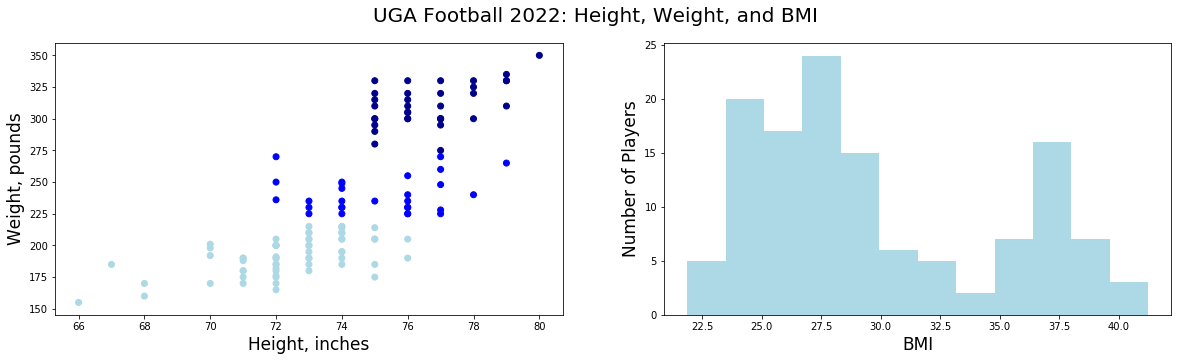

In [437]:
#exclude those with a blank weight class, create new dataset
data2 = data[data['Weight Class'] != 'N/A']

fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=False)

colors = {'Heavy': 'darkblue', 'Average': 'blue', 'Light':'lightblue'}

#plots
ax[0].scatter(data2['Height, inches'], data2['Weight'], c=data2['Weight Class'].map(colors))
ax[1].hist(data['BMI'], bins = 12, color = 'lightblue')
fig.suptitle('UGA Football 2022: Height, Weight, and BMI', fontsize = 20)

#axis settings
ax[0].set_ylabel('Weight, pounds', fontsize = 17)
ax[0].set_xlabel('Height, inches', fontsize = 17)
ax[1].set_xlabel('BMI', fontsize = 17)
ax[1].set_ylabel('Number of Players', fontsize = 17)

#xticks = [1, 2, 3]
#xlabels = [1, 2, 3]
#plt.xticks(ticks = xticks, labels = xlabels)

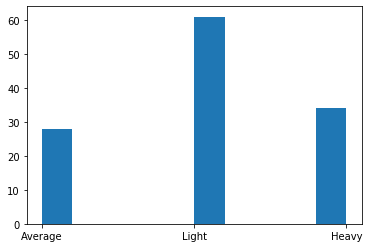

In [447]:
#weight class distribution, exploratory
plt.hist(data2['Weight Class'])
plt.show()

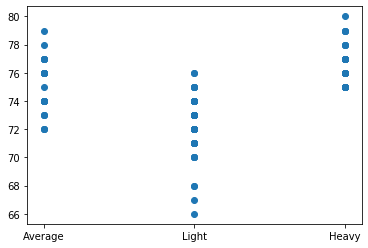

In [439]:
#weight class by height, exploratory
plt.scatter(data2['Weight Class'], data2['Height, inches'])
plt.show()

In [ ]:
#Graveyard:

#weight_classes = ['Light', 'Average', 'Heavy']
#weight_class_rank = [1, 2, 3]
#class_rank_zip = zip(*sorted(zip(weight_class_rank, weight_classes)))
#class_rank_list = list(class_rank_zip)[1]


#print(class_rank_list)


#alt.renderers.enable(renderer)
#alt.renderers.enable('default')